In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [11]:
nb_classes = 12

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

linestr=''


Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [13]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
        
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 11s 181us/step - loss: 0.2508 - val_loss: 0.1229
Epoch 2/4
60000/60000 [==============================] - 10s 174us/step - loss: 0.1011 - val_loss: 0.0911
Epoch 3/4
60000/60000 [==============================] - 10s 172us/step - loss: 0.0722 - val_loss: 0.0700
Epoch 4/4
60000/60000 [==============================] - 11s 175us/step - loss: 0.0559 - val_loss: 0.0726


In [14]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

10000/10000 [==============================] - 1s 73us/step
0.07255508142614271


In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

print(predicted_classes)
print(len(predicted_classes))

# Check which items we got right / wrong
predictyes=(predicted_classes == y_test)
print(predictyes)

predictnum=np.nonzero(predictyes)
print(predictnum)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print("correct",correct_indices)
print("incorrect",incorrect_indices)

[7 2 1 ... 4 5 6]
10000
[ True  True  True ...  True  True  True]
(array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),)
correct [   0    1    2 ... 9997 9998 9999]
incorrect [ 149  233  247  321  340  381  445  447  495  582  583  646  691  717
  720  740  844  877  924  947  951 1014 1039 1112 1128 1181 1226 1232
 1242 1247 1289 1299 1319 1328 1393 1433 1500 1522 1530 1549 1553 1609
 1621 1681 1737 1782 1790 1800 1850 1878 1901 1987 2004 2035 2044 2053
 2070 2093 2098 2109 2118 2135 2182 2291 2299 2326 2369 2387 2408 2488
 2526 2607 2635 2648 2654 2720 2810 2877 2896 2921 2927 2939 2953 2990
 3005 3023 3062 3073 3251 3388 3405 3475 3490 3503 3520 3549 3550 3558
 3559 3567 3597 3762 3808 3811 3818 3853 3869 3893 3943 3968 3985 4063
 4065 4075 4140 4154 4176 4201 4224 4248 4271 4289 4360 4369 4425 4497
 4500 4536 4601 4615 4639 4671 4731 4751 4761 4807 4823 4876 4880 4956
 4978 5331 5450 5634 5642 5676 5734 5749 5936 5937 5955 5972 5973 5982
 6028 6045 6059 6166 6172 6532 655

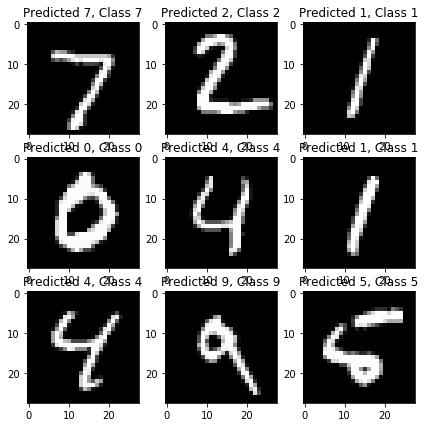

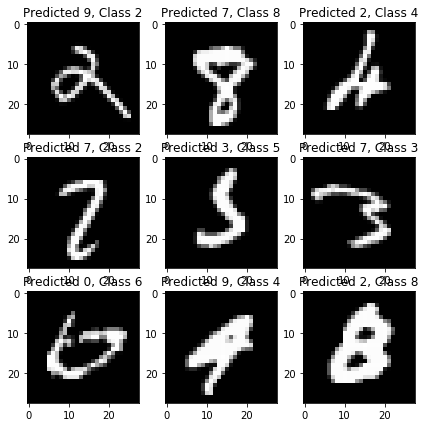

In [16]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [33]:
import cv2
import numpy as np

img=cv2.imread("handwritings.jpg")
#cv2.imshow("mw",img)
#cv2.waitKey(0)
W=1100
L=1500
NW=780
NL=1200
X0=100
Y0=200
for i in range(2):
    for j in range(4):
        imdig=img[X0+L*i:X0+L*i+NL,Y0+W*j:Y0+W*j+NW]
        cv2.imshow("imdig",imdig)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.rectangle(img,(Y0+W*j,X0+L*i),(Y0+W*j+NW,X0+L*i+NL),(0,255,0),3)        
        cv2.imwrite(filename,imdig)
        cv2.waitKey(0)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
import cv2  

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg


In [36]:
import cv2
img = cv2.imread("hn28inv11.jpg")
print(len(img))
print(len(img[0]))
cv2.imshow("hninv",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

28
28


x to be predicted original shape (28, 28, 3)
x to be predicted original shape (28, 28)


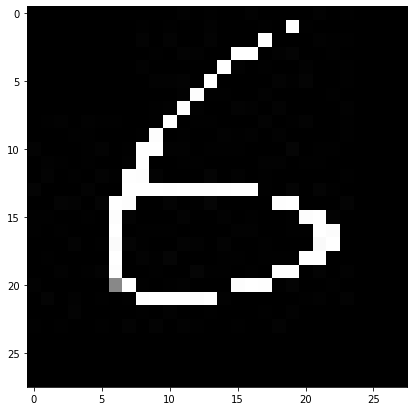

In [37]:
print("x to be predicted original shape", img.shape)
GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("x to be predicted original shape", GrayImg.shape)
plt.imshow(GrayImg, cmap='gray', interpolation='none')

In [38]:
X_pred = GrayImg.reshape(1, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Predicating matrix shape", X_pred.shape)

Predicating matrix shape (1, 784)


In [39]:
predicted_classes = model.predict_classes(X_pred)

print(predicted_classes)

[6]


In [40]:
import cv2
import numpy

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

(8, 28, 28)


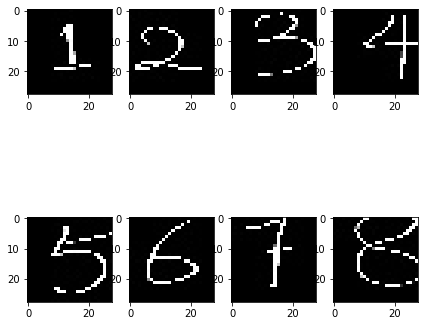

In [41]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')

In [42]:
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

Testing matrix shape (8, 784)
[1 2 5 5 5 6 1 5]


In [43]:
model.save("ministxkn.h5")

In [44]:
del model

In [45]:
try:
    predicted_classes = model.predict_classes(X_pred)
except:
    print("model not found, you have deleted it on purpose.")

model not found, you have deleted it on purpose.


In [46]:
from keras.models import load_model

model = load_model('ministxkn.h5')

In [47]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[1 2 5 5 5 6 1 5]


In [51]:
print(X_train.shape)
print(X_pred.shape)

print(X_train[0:8])
print(X_pred[0:8])

X_train[0:8]=X_pred

print(X_train[0:8])

for i in range(8):
    y_train[i]=i+1
    

print(y_train[0:10])

Y_train = np_utils.to_categorical(y_train, nb_classes)


print(Y_train[0:10])

(60000, 784)
(8, 784)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.00392157 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.00392157 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00

In [52]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 10s 174us/step - loss: 0.0280 - val_loss: 0.0782
Epoch 2/4
60000/60000 [==============================] - 10s 172us/step - loss: 0.0242 - val_loss: 0.0761
Epoch 3/4
60000/60000 [==============================] - 10s 171us/step - loss: 0.0262 - val_loss: 0.0643
Epoch 4/4
60000/60000 [==============================] - 10s 171us/step - loss: 0.0214 - val_loss: 0.0747


In [53]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[1 2 3 4 5 6 7 8]


In [54]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

print(Y_train[0:10])


model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 10s 171us/step - loss: 0.0204 - val_loss: 0.0881
Epoch 2/4
60000/60000 [==============================] - 10s 171us/step - loss: 0.0204 - val_loss: 0.0683
Epoch 3/4
60000/60000 [==============================] - 10s 175us/step - loss: 0.0187 - val_loss: 0.0707
Epoch 4/4
60000/60000 [==============================] - 10s 175us/step - loss: 0.0150 - val_loss: 0.0760


In [55]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[1 2 3 4 5 6 7 8]
